In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data

In [2]:
cpi = pd.read_csv('CPIAUCSL.csv',index_col='DATE', parse_dates=True) # Consumer Price Index
cpi_ls_fe = pd.read_csv('CPILFESL.csv',index_col='DATE', parse_dates=True) # Consumer Price Index Less Food and Engery
eci = pd.read_csv('ECIWAG.csv',index_col='DATE', parse_dates=True) # Employement Price Index

ppi = pd.read_csv('PPIACO.csv', index_col='DATE', parse_dates=True) # Producer Price Index
gdp_def = pd.read_csv('GDPDEF.csv',index_col='DATE', parse_dates=True) # GPD Defaltor
imi = pd.read_csv('IR.csv',index_col='DATE', parse_dates=True) # Import Price Index
m2 = pd.read_csv('M2SL.csv',index_col='DATE', parse_dates=True) # Money2
pce = pd.read_csv('PCE.csv',index_col='DATE', parse_dates=True) # Personal Consumption Ex 
csi = pd.read_csv('UMCSENT.csv',index_col='DATE', parse_dates=True) # Consumer Sentiment Index

In [3]:
# eci = pd.read_csv('./data/CIS1020000000000I.csv',index_col='DATE', parse_dates=True) # Employement Price Index

In [4]:
cpi.info()
cpi_ls_fe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 1947-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  929 non-null    float64
dtypes: float64(1)
memory usage: 14.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 809 entries, 1957-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPILFESL  809 non-null    float64
dtypes: float64(1)
memory usage: 12.6 KB


In [5]:
cpi_pce = cpi.join(pce, how='inner')

cpi_pce['2018':].corr()
# cpi_pce

,CPIAUCSL,PCE
CPIAUCSL,1.000000,0.983941
PCE,0.983941,1.000000


# 2. Explore Data and Clean Data

In [6]:

cpi.info()
cpi.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 1947-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  929 non-null    float64
dtypes: float64(1)
memory usage: 46.8 KB


,CPIAUCSL
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [7]:
cpi.tail() # Dtype already float

,CPIAUCSL
DATE,
2024-01-01,309.685
2024-02-01,311.054
2024-03-01,312.230
2024-04-01,313.207
2024-05-01,313.225


In [8]:
cpi.isnull().sum()

CPIAUCSL    0
dtype: int64

In [9]:
eci.info()
eci.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2001-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ECIWAG  93 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


,ECIWAG
DATE,
2001-01-01,87.6
2001-04-01,88.4
2001-07-01,89.2
2001-10-01,90.0
2002-01-01,90.7


In [10]:
eci.tail()
eci.isnull().sum()

ECIWAG    0
dtype: int64

In [11]:
ppi.info()
ppi.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337 entries, 1913-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPIACO  1337 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB


,PPIACO
DATE,
1913-01-01,12.1
1913-02-01,12.0
1913-03-01,12.0
1913-04-01,12.0
1913-05-01,11.9


In [12]:
gdp_def.info()
gdp_def.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 1947-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDPDEF  309 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


,GDPDEF
DATE,
1947-01-01,11.141
1947-04-01,11.299
1947-07-01,11.489
1947-10-01,11.772
1948-01-01,11.865


In [13]:
gdp_def.tail()
gdp_def.isnull().sum()

GDPDEF    0
dtype: int64

In [14]:
imi.info()
imi.head() # data is an object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 1982-09-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IR      501 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


,IR
DATE,
1982-09-01,80.0
1982-10-01,.
1982-11-01,.
1982-12-01,79.9
1983-01-01,.


In [15]:
imi.head(20)

,IR
DATE,
1982-09-01,80.0
1982-10-01,.
1982-11-01,.
1982-12-01,79.9
1983-01-01,.
1983-02-01,.
1983-03-01,77.7
1983-04-01,.
1983-05-01,.


In [16]:
imi.value_counts() # We have . 50 in our data

IR   
.        50
139.4     8
142.2     5
141.2     5
94.0      5
         ..
141.6     1
141.7     1
121.6     1
141.9     1
76.9      1
Name: count, Length: 283, dtype: int64

In [17]:
imi['2020':].value_counts() # There is no value of '.' after 2020 so we gonna fill '.' with 0

IR   
139.4    4
123.4    2
139.7    2
140.1    2
140.3    2
141.0    2
141.8    2
144.6    1
143.1    1
142.7    1
142.6    1
138.4    1
141.6    1
141.3    1
141.2    1
146.4    1
140.5    1
146.8    1
147.5    1
139.9    1
148.2    1
118.2    1
137.9    1
119.0    1
126.5    1
120.6    1
121.3    1
122.1    1
123.2    1
123.3    1
124.3    1
124.6    1
125.2    1
128.0    1
137.4    1
129.9    1
131.1    1
132.8    1
134.2    1
134.3    1
134.6    1
134.9    1
136.9    1
148.5    1
Name: count, dtype: int64

In [18]:
imi.replace('.', 0,inplace=True)
imi['IR'] = imi.astype('float')
imi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 1982-09-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IR      501 non-null    float64
dtypes: float64(1)
memory usage: 24.0 KB


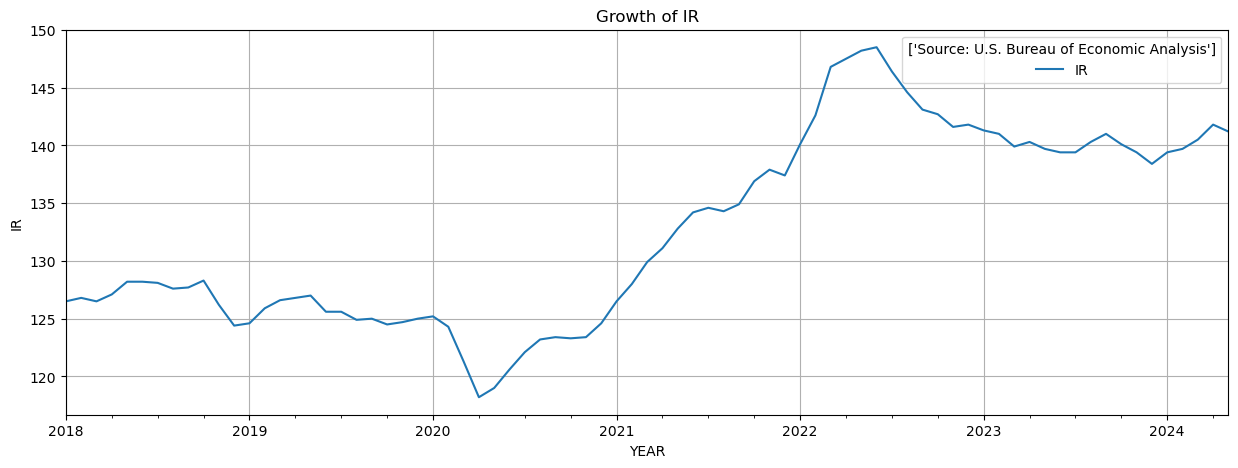

In [19]:
imi['2018-01-01':].plot(figsize=(15, 5), xlabel='YEAR', ylabel='IR', title='Growth of IR', grid=True)
plt.legend(title=['Source: U.S. Bureau of Economic Analysis'])
plt.show()

In [20]:
m2.info()
m2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 1959-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M2SL    785 non-null    float64
dtypes: float64(1)
memory usage: 12.3 KB


,M2SL
DATE,
1959-01-01,286.6
1959-02-01,287.7
1959-03-01,289.2
1959-04-01,290.1
1959-05-01,292.2


In [21]:
pce.info()
pce.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 1959-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCE     785 non-null    float64
dtypes: float64(1)
memory usage: 28.4 KB


,PCE
DATE,
1959-01-01,306.1
1959-02-01,309.6
1959-03-01,312.7
1959-04-01,312.2
1959-05-01,316.1


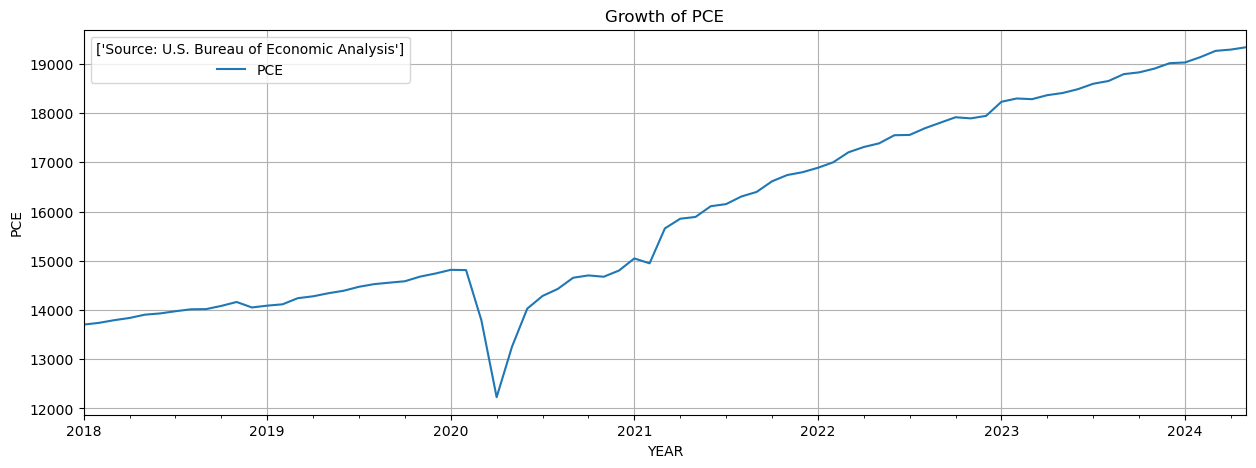

In [22]:
pce['2018':].plot(figsize=(15, 5), xlabel='YEAR', ylabel='PCE', title='Growth of PCE', grid=True)
plt.legend(title=['Source: U.S. Bureau of Economic Analysis'])
plt.show()

In [23]:
# oil.info()
# oil.head()

In [24]:
csi.info()
csi.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 859 entries, 1952-11-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   UMCSENT  859 non-null    object
dtypes: object(1)
memory usage: 13.4+ KB


,UMCSENT
DATE,
1952-11-01,86.2
1952-12-01,.
1953-01-01,.
1953-02-01,90.7
1953-03-01,.


In [25]:
csi.value_counts()

UMCSENT
.          210
91.5         8
95.9         6
92.4         6
91.7         6
          ... 
84.7         1
85.1         1
85.4         1
85.5         1
62           1
Name: count, Length: 362, dtype: int64

In [26]:
csi['2010':].value_counts() # There is no . after 2000

UMCSENT
63.7       3
82.5       3
73.6       3
98.2       3
67.8       2
          ..
71.6       1
70.6       1
70.3       1
69.9       1
99.8       1
Name: count, Length: 145, dtype: int64

In [27]:
csi.replace('.', 0,inplace=True)
csi['UMCSENT'] = csi['UMCSENT'].astype('float')
csi.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 859 entries, 1952-11-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UMCSENT  859 non-null    float64
dtypes: float64(1)
memory usage: 45.7 KB


In [28]:
csi.head()

,UMCSENT
DATE,
1952-11-01,86.2
1952-12-01,0.0
1953-01-01,0.0
1953-02-01,90.7
1953-03-01,0.0


In [29]:
csi.duplicated()

DATE
1952-11-01    False
1952-12-01    False
1953-01-01     True
1953-02-01    False
1953-03-01     True
              ...  
2024-01-01     True
2024-02-01     True
2024-03-01    False
2024-04-01     True
2024-05-01     True
Length: 859, dtype: bool

# 3. Transform Data

In [30]:
mer_cpi = cpi.join([ppi, m2], how='inner')
mer_cpi.tail(10)

,CPIAUCSL,PPIACO,M2SL
DATE,,,
2023-08-01,306.187,257.680,20765.3
2023-09-01,307.288,258.934,20710.9
2023-10-01,307.531,255.192,20691.7
2023-11-01,308.024,252.856,20705.1
2023-12-01,308.742,249.866,20754.0
2024-01-01,309.685,251.306,20754.4
2024-02-01,311.054,254.914,20748.6
2024-03-01,312.230,255.116,20842.1
2024-04-01,313.207,257.153,20870.2


In [31]:
mer_cpi.info()
mer_cpi_quatery = mer_cpi.resample('QS').mean()
mer_cpi_quatery

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 1959-01-01 to 2024-05-01
Freq: MS
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  785 non-null    float64
 1   PPIACO    785 non-null    float64
 2   M2SL      785 non-null    float64
dtypes: float64(3)
memory usage: 24.5 KB


,CPIAUCSL,PPIACO,M2SL
DATE,,,
1959-01-01,28.993333,31.700000,287.833333
1959-04-01,29.043333,31.766667,292.133333
1959-07-01,29.193333,31.666667,296.100000
1959-10-01,29.370000,31.533333,297.133333
1960-01-01,29.396667,31.666667,298.633333
...,...,...,...
2023-04-01,303.466667,254.812667,20800.933333
2023-07-01,306.034333,256.816333,20756.500000
2023-10-01,308.099000,252.638000,20716.933333


In [32]:
# Resample CPI to quaterly

cpi = cpi.resample('QS').mean()
cpi

,CPIAUCSL
DATE,
1947-01-01,21.700000
1947-04-01,22.010000
1947-07-01,22.490000
1947-10-01,23.126667
1948-01-01,23.616667
...,...
2023-04-01,303.466667
2023-07-01,306.034333
2023-10-01,308.099000


In [33]:
ppi = ppi.resample('QS').mean()
ppi

,PPIACO
DATE,
1913-01-01,12.033333
1913-04-01,11.933333
1913-07-01,12.066667
1913-10-01,12.066667
1914-01-01,11.766667
...,...
2023-04-01,254.812667
2023-07-01,256.816333
2023-10-01,252.638000


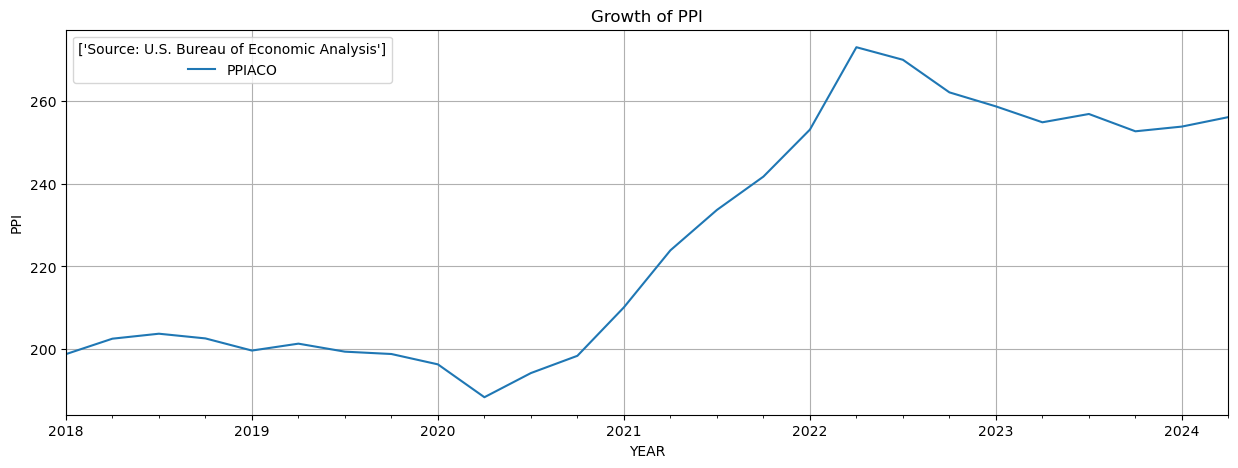

In [34]:
ppi['2018-01-01':].plot(figsize=(15, 5), xlabel='YEAR', ylabel='PPI', title='Growth of PPI', grid=True)
plt.legend(title=['Source: U.S. Bureau of Economic Analysis'])
plt.show()

In [35]:
imi

,IR
DATE,
1982-09-01,80.0
1982-10-01,0.0
1982-11-01,0.0
1982-12-01,79.9
1983-01-01,0.0
...,...
2024-01-01,139.4
2024-02-01,139.7
2024-03-01,140.5


In [36]:
imi = imi.resample('QS').mean()
imi

,IR
DATE,
1982-07-01,80.000000
1982-10-01,26.633333
1983-01-01,25.900000
1983-04-01,25.933333
1983-07-01,25.866667
...,...
2023-04-01,139.800000
2023-07-01,140.233333
2023-10-01,139.300000


In [37]:
m2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 1959-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M2SL    785 non-null    float64
dtypes: float64(1)
memory usage: 28.4 KB


In [38]:
m2 = m2.resample('QS').mean()
m2

,M2SL
DATE,
1959-01-01,287.833333
1959-04-01,292.133333
1959-07-01,296.100000
1959-10-01,297.133333
1960-01-01,298.633333
...,...
2023-04-01,20800.933333
2023-07-01,20756.500000
2023-10-01,20716.933333


In [39]:
# oil

In [40]:
# oil = oil.resample('QS').mean()
# oil

In [41]:
csi 

,UMCSENT
DATE,
1952-11-01,86.2
1952-12-01,0.0
1953-01-01,0.0
1953-02-01,90.7
1953-03-01,0.0
...,...
2024-01-01,79.0
2024-02-01,76.9
2024-03-01,79.4


In [42]:
csi = csi.resample('QS').mean()
csi
m2

,M2SL
DATE,
1959-01-01,287.833333
1959-04-01,292.133333
1959-07-01,296.100000
1959-10-01,297.133333
1960-01-01,298.633333
...,...
2023-04-01,20800.933333
2023-07-01,20756.500000
2023-10-01,20716.933333


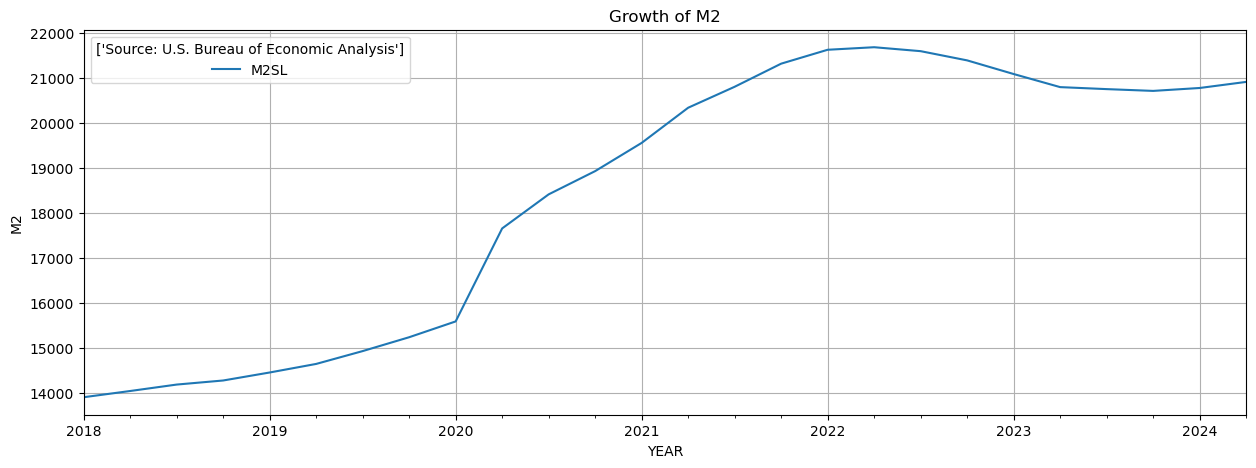

In [43]:
m2['2018':].plot(xlabel='YEAR', ylabel='M2', title='Growth of M2', grid=True, figsize=(15, 5))
plt.legend(title=['Source: U.S. Bureau of Economic Analysis'])
plt.show()

In [44]:
mer_cpi

,CPIAUCSL,PPIACO,M2SL
DATE,,,
1959-01-01,29.010,31.700,286.6
1959-02-01,29.000,31.700,287.7
1959-03-01,28.970,31.700,289.2
1959-04-01,28.980,31.800,290.1
1959-05-01,29.040,31.800,292.2
...,...,...,...
2024-01-01,309.685,251.306,20754.4
2024-02-01,311.054,254.914,20748.6
2024-03-01,312.230,255.116,20842.1


In [45]:
# New Merge mer_cpi_quater with other indicator cpi have ([ppi, imi,m2, oil, csi], how='inner')
merge_weak_cpi = cpi.join([m2, csi], how='inner')
df_quat = mer_cpi_quatery.join([pce,eci], how='inner')
df_quat['2001':]

,CPIAUCSL,PPIACO,M2SL,PCE,ECIWAG
DATE,,,,,
2001-01-01,175.900000,137.766667,5020.600000,6987.4,87.6
2001-04-01,177.133333,136.233333,5147.466667,7004.2,88.4
2001-07-01,177.633333,133.366667,5263.000000,7082.3,89.2
2001-10-01,177.500000,129.400000,5383.900000,7212.9,90.0
2002-01-01,178.066667,128.900000,5477.566667,7184.6,90.7
...,...,...,...,...,...
2023-01-01,301.203000,258.652667,21092.100000,18229.6,159.4
2023-04-01,303.466667,254.812667,20800.933333,18363.8,161.1
2023-07-01,306.034333,256.816333,20756.500000,18595.4,162.7


/Users/anbschool0032/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


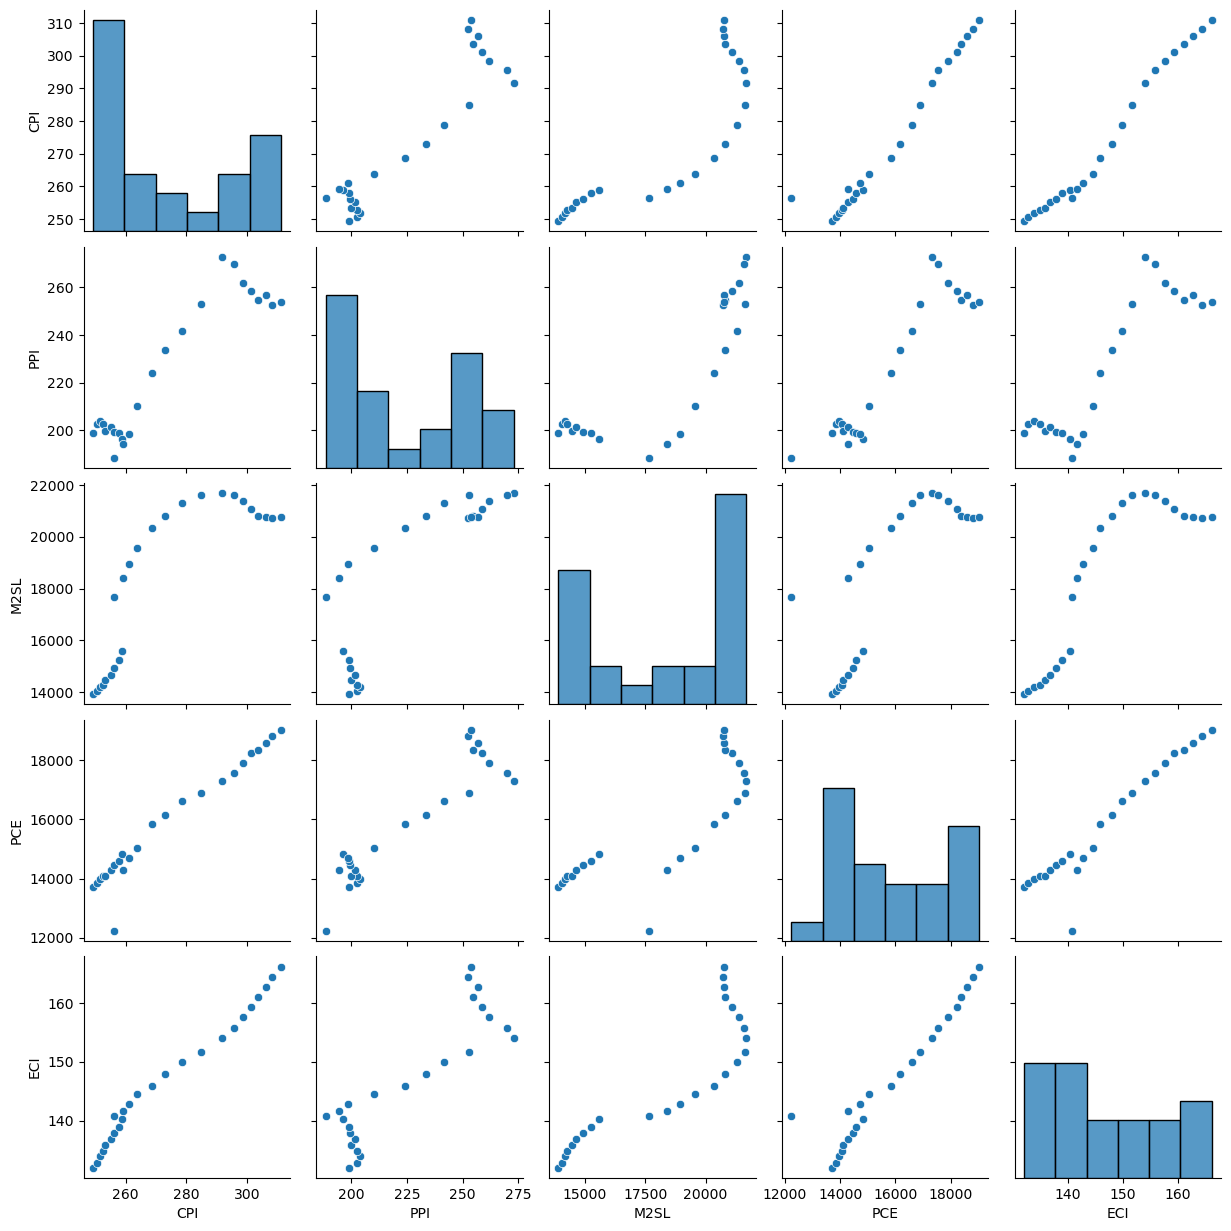

In [65]:
sns.pairplot(df_quat['2018-01-01':])

In [47]:
df_quat.columns = ['CPI', "PPI", 'M2SL', "PCE", 'ECI']


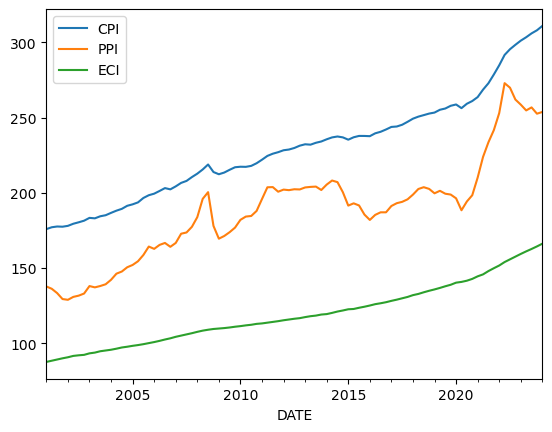

In [48]:
df_quat[['CPI', "PPI",'ECI']].plot()
plt.show()

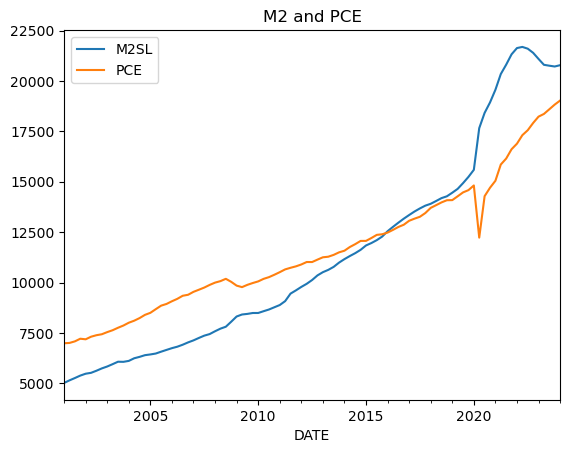

In [49]:
df_quat[['M2SL', "PCE"]].plot()
plt.title('M2 and PCE')
plt.show()

In [64]:
# How correlation period 2018 to present
df_quat['2018':].corr()

,CPI,PPI,M2SL,PCE,ECI
CPI,1.000000,0.925910,0.832295,0.971952,0.988882
PPI,0.925910,1.000000,0.834667,0.928060,0.884793
M2SL,0.832295,0.834667,1.000000,0.801829,0.870208
PCE,0.971952,0.928060,0.801829,1.000000,0.953382
ECI,0.988882,0.884793,0.870208,0.953382,1.000000


<Axes: >

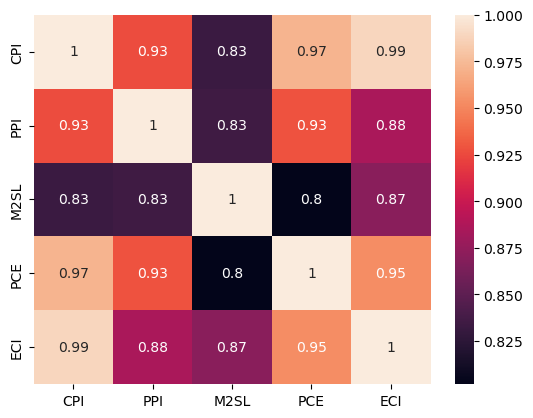

In [51]:
sns.heatmap(df_quat['2018':].corr(),annot= True)

In [52]:
merge_weak_cpi['2018':].info()
merge_weak_cpi['2018':]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2018-01-01 to 2024-04-01
Freq: QS-JAN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  26 non-null     float64
 1   M2SL      26 non-null     float64
 2   UMCSENT   26 non-null     float64
dtypes: float64(3)
memory usage: 832.0 bytes


,CPIAUCSL,M2SL,UMCSENT
DATE,,,
2018-01-01,249.321667,13906.400000,98.933333
2018-04-01,250.679000,14044.666667,98.333333
2018-07-01,251.686333,14187.700000,98.066667
2018-10-01,252.711000,14278.333333,98.133333
2019-01-01,253.385667,14456.066667,94.466667
2019-04-01,255.247333,14646.600000,98.466667
2019-07-01,256.089333,14931.966667,93.800000
2019-10-01,257.888000,15240.266667,97.200000
2020-01-01,258.767333,15591.633333,96.633333


In [53]:
merge_weak_cpi['2018':].corr()

,CPIAUCSL,M2SL,UMCSENT
CPIAUCSL,1.000000,0.827926,-0.795664
M2SL,0.827926,1.000000,-0.924153
UMCSENT,-0.795664,-0.924153,1.000000


In [54]:
eci

,ECIWAG
DATE,
2001-01-01,87.6
2001-04-01,88.4
2001-07-01,89.2
2001-10-01,90.0
2002-01-01,90.7
...,...
2023-01-01,159.4
2023-04-01,161.1
2023-07-01,162.7


In [55]:
# ECI as main to have quaterly index
# cpi_ls_fe
merge_data = eci.join([cpi, ppi, gdp_def, imi, m2, pce, oil, csi])
# Change Columns name
merge_data.columns = ['ECI', 'CPI', 'PPI', 'GDP_DFL', 'IPI', 'M2', 'PCE', 'OIL Price', 'CSI']
merge_data 

NameError: name 'oil' is not defined

In [ ]:
merge_data

In [ ]:
merge_cpi = cpi.join([ppi, gdp_def, imi, m2, pce, csi,eci],how="inner")
merge_cpi['2018':].corr()

In [ ]:
cpi_ls_fe = cpi_ls_fe.resample('QS').mean()
cpi_ls_fe

In [ ]:
eci

In [ ]:
ppi_quart = mer_cpi_quatery['PPIACO']
# ipi_quart = mer_cpi_quatery['IR']


In [ ]:
merge_cpi_ls_fe = cpi_ls_fe.join([eci,pce,ppi_quart,ipi_quart])
merge_cpi_ls_fe['2018':]

In [ ]:
merge_cpi_ls_fe['2018':].corr()

In [ ]:
# Period from 2018
merge_cpi_ls_fe = merge_cpi_ls_fe['2018':]

In [ ]:
mer_cpi_quatery

In [ ]:
merge_cpi_ls_fe.dropna(axis=0, inplace=True)


In [ ]:
merge_cpi_ls_fe.corr()

In [ ]:
# Merge CPI Less Food Engergy and ECI


sns.heatmap(merge_cpi_ls_fe.corr(),annot=True)

In [ ]:
cor_18 = merge_data['2018':].corr()
cor_18[cor_18 != 1].max()

In [ ]:
# merge_cor = merge_data['2010':].corr(method='pearson')

# merge_18 = merge_data['2018':]

In [ ]:
# merge_18.corr()

In [ ]:
merge_18[['CPI', 'ECI', 'GDPDEF', 'PCE']].corr(method='pearson')

In [ ]:
sns.heatmap(merge_data.corr(method='pearson'), annot=True)

In [ ]:
# sns. merge_cpi_ls_fe['2018':].corr()

In [ ]:
sns.heatmap(merge_data['2018':].corr(method='pearson'),annot=True)

# Forecast